In [1]:
import warnings
warnings.simplefilter("ignore")

import sys
import os
import sklearn
import numpy as np

np.random.seed(42)

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Saves to images
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR,"images")
os.makedirs(IMAGES_PATH,exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

<h1>Preprocessing</h1>
<p>MNIST</p>

In [2]:
import tensorflow as tf

In [3]:
# if tensorflow is not installed. use this
#pip install tensorflow

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
y_train.shape

(60000,)

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
#x_trainained to reduce the dimesions to 2. Otherwise SGD Classfier will not x_trainin
x_train = x_train.reshape((len(x_train),28*28))
x_test = x_test.reshape((len(x_test),28*28))

(-0.5, 27.5, 27.5, -0.5)

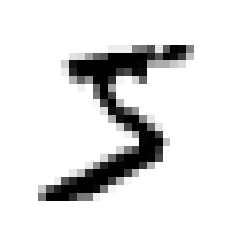

In [8]:
plt.imshow(x_train[0].reshape(28,28),cmap=mpl.cm.binary)
plt.axis("off")

In [9]:
y_train[0]

5

In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

SGD Clasifier is based on stochastic gradient descent formula.
Stochastic Graident Descent will optimse the cost function. Through we will able to find efficient model.
Stochastic Gardient Descent:<br>
&Delta;&Theta; -> &Theta;+&eta;	&part;f(&Theta;)/	&part;&Theta;<br>
&Theta; = old value <br>
&Delta;&Theta; = new value <br>
&eta; = Learning<br>

In [14]:
from sklearn.linear_model import SGDClassifier

#
# Max Iterations = 1000
# Tolerance = 0.0001
#
sgd_class = SGDClassifier(max_iter=1000,tol=1e-3,random_state=42)
sgd_class.fit(x_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
somedigit = (x_train[0])
sgd_class.predict([somedigit])

array([3], dtype=uint8)

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_class,x_train,y_train,cv=3,scoring="accuracy")

array([0.87082583, 0.87089354, 0.88628294])

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3,random_state=42)

for train_index, test_index in skfolds.split(x_train,y_train):
    clone_clf = clone(sgd_class)
    x_train_folds = x_train[train_index]
    y_train_folds = y_train[train_index]
    x_test_fold = x_test[test_index]
    y_test_fold = y_test[test_index]
    
    clone_clf.fit(x_train_folds,y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    ncorrect = sum(y_pred == y_test_fold)
    print(ncorrect/len(y_pred))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [20]:
x_test.shape

(10000, 784)